In [16]:
import os, requests, zipfile, io
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Script para Download dos dados do ENADE - 2017 a 2019

In [2]:
# Modificando para o diretório atual
os.chdir(os.path.abspath(''))

In [3]:
## Importando os dados de 2017
r = requests.get('https://download.inep.gov.br/microdados/Enade_Microdados/microdados_Enade_2017_portal_2018.10.09.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(os.path.abspath('')+'/dados/enade2017')

In [4]:
## Importando os dados de 2018
r = requests.get('https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2018.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(os.path.abspath('')+'/dados/enade2018')

In [5]:
## Importando os dados de 2019
r = requests.get('https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(os.path.abspath('')+'/dados/enade2019')

# 2. Base de dados SQLite 

In [3]:
#inicia a engine do banco de dados
engine = sqlalchemy.create_engine('sqlite:///enade.db', echo=False)

In [2]:
# Carrega os dados nos dataframes
df2017 = pd.read_csv("./dados/enade2017/3.DADOS/MICRODADOS_ENADE_2017.txt", encoding='utf-8', sep = ';')
df2018 = pd.read_csv("./dados/enade2018/2018/3.DADOS/microdados_enade_2018.txt", encoding='utf-8', sep = ';' )
df2019= pd.read_csv("./dados/enade2019/3.DADOS/microdados_enade_2019.txt", encoding='utf-8', sep = ';')

C:\Users\melis\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (29,31,32,44,45,46,47,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\melis\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (48,49,50,51,52,53,57,58,59,84,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.concat([df2017, df2018, df2019])

## 2.1. Adiciona os dados ao banco de dados

In [6]:
df2017.to_sql("enade", con=engine, if_exists="append", index=False)

In [7]:
df2018.to_sql("enade", con=engine, if_exists="append", index=False)

In [8]:
df2019.to_sql("enade", con=engine, if_exists="append", index=False)

## 2.2. Cria as tabelas relacionais no Banco de Dados de acordo com o Modelo de Estrela

In [9]:
#tabela EXAME_ENADE
with engine.connect() as con:
    con.execute(
     """
     create table EXAME_ENADE as 
     select NU_ANO, TP_PRES, NT_GER from enade
     """)

In [10]:
#tabela ALUNO
with engine.connect() as con:
    con.execute(
     """
     create table ALUNO as 
     select NU_IDADE TP_SEXO, ANO_FIM_EM, TP_INSCRICAO_ADM, TP_INSCRICAO from enade
     """)

In [11]:
#tabela INSTITUICAO
with engine.connect() as con:
    con.execute(
     """
     create table INSTITUICAO as 
     select CO_IES, CO_CATEGAD, CO_ORGACAD from enade
     """)

In [12]:
#tabela CURSO
with engine.connect() as con:
    con.execute(
     """
     create table CURSO as 
     select  CO_GRUPO, CO_CURSO, CO_MODALIDADE, CO_MUNIC_CURSO, CO_UF_CURSO, CO_REGIAO_CURSO, ANO_IN_GRAD, CO_TURNO_GRADUACAO from enade
     """)

In [14]:
#tabela PROVA
with engine.connect() as con:
    con.execute(
     """
     create table PROVA as 
     select TP_PR_GER, NT_FG from enade
     """)

In [15]:
#tabela DISCURSIVA
with engine.connect() as con:
    con.execute(
     """
     create table DISCURSIVA as 
     select TP_PR_DI_FG, TP_PR_DI_CE, TP_SFG_D1, TP_SFG_D2, TP_SCE_D1, TP_SCE_D2, TP_SCE_D3, NT_DIS_FG, NT_FG_D1, 
     NT_FG_D1_PT, NT_FG_D1_CT, NT_FG_D2, NT_FG_D2_PT, NT_FG_D2_CT, NT_CE, NT_DIS_CE, NT_CE_D1, NT_CE_D2, NT_CE_D3 from enade
     """)

In [17]:
#tabela OBJETIVO
with engine.connect() as con:
    con.execute(
     """
     create table OBJETIVA as 
     select NU_ITEM_OFG, NU_ITEM_OFG_Z, NU_ITEM_OFG_X, NU_ITEM_OFG_N, NU_ITEM_OCE, NU_ITEM_OCE_Z, NU_ITEM_OCE_X,
     NU_ITEM_OCE_N, TP_PR_OB_FG, TP_PR_OB_CE, NT_OBJ_FG, NT_OBJ_CE from enade
     """)

In [18]:
#tabela GABARITO
with engine.connect() as con:
    con.execute(
     """
     create table GABARITO as 
     select DS_VT_GAB_OFG_ORIG, DS_VT_GAB_OFG_FIN, DS_VT_GAB_OCE_ORIG, DS_VT_GAB_OCE_FIN, DS_VT_ESC_OFG, DS_VT_ACE_OFG,
     DS_VT_ESC_OCE, DS_VT_ACE_OCE from enade
     """)

In [19]:
#tabela QUESTIONARIO_PROVA
with engine.connect() as con:
    con.execute(
     """
     create table QUESTIONARIO_PROVA as 
     select CO_RS_I1, CO_RS_I2, CO_RS_I3, CO_RS_I4, CO_RS_I5, CO_RS_I6, CO_RS_I7, CO_RS_I8, CO_RS_I9 from enade
     """)

In [20]:
#tabela QUESTIONARIO_ALUNO
with engine.connect() as con:
    con.execute(
     """
     create table QUESTIONARIO_ALUNO as 
     select QE_I01, QE_I02, QE_I03, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11
     QE_I12, QE_I13, QE_I14, QE_I15, QE_I16, QE_I17, QE_I18, QE_I19, QE_I20, QE_I21, QE_I22
     QE_I23, QE_I24, QE_I25, QE_I26, QE_I27, QE_I28, QE_I29, QE_I30, QE_I31, QE_I32, QE_I32
     QE_I33, QE_I34, QE_I35, QE_I36, QE_I37, QE_I38, QE_I39, QE_I40, QE_I41, QE_I42, QE_I43
     QE_I44, QE_I45, QE_I46, QE_I47, QE_I48, QE_I49, QE_I50, QE_I51, QE_I52, QE_I53, QE_I54
     QE_I55, QE_I56, QE_I57, QE_I58, QE_I59, QE_I60, QE_I61, QE_I62, QE_I63, QE_I64, QE_I65
     QE_I66, QE_I67, QE_I68 from enade
     """)

In [21]:
#tabela QUESTIONARIO_LICENCIATURA
with engine.connect() as con:
    con.execute(
     """
     create table QUESTIONARIO_LICENCIATURA as 
     select QE_I69, QE_I70, QE_I71, QE_I72, QE_I73, QE_I74, QE_I75, QE_I76, QE_I77
     QE_I78, QE_I79, QE_I80, QE_I81 from enade
     """)

In [23]:
#drop da table não relacional
with engine.connect() as con:
    con.execute(
     """
     drop table enade
     """)

# 3. Análise Exploratória

In [4]:
df.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1. Porcentagem dos gêneros nas provas do ENADE

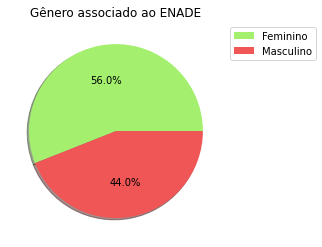

In [15]:
plt.pie(df.TP_SEXO.value_counts(), autopct='%1.1f%%', shadow=True, colors=['#A4F06E','#F05656'])
plt.title('Gênero associado ao ENADE')
plt.legend(bbox_to_anchor=(1, 1), labels=['Feminino','Masculino'])
plt.show()

## 3.2. Porcentagem de Cor e Raça nas provas do ENADE

In [120]:
#verficando a existencia de valores nulos
df.QE_I02.isnull().any()

True

In [102]:
#modificando os valores das labels para amostragem
cor_raca = df['QE_I02'].replace({'A': 'Branca', 'B':'Preta', 'C':'Amarela', 'D':'Parda', 'E':'Indígena', 'F':'Não Declarado'})

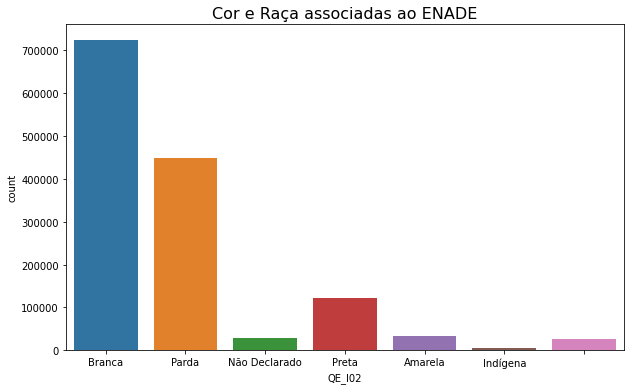

In [108]:
plt.figure(figsize=(10,6))
plt.title("Cor e Raça associadas ao ENADE", fontsize=16)
sns.countplot(x=cor_raca)

plt.show()

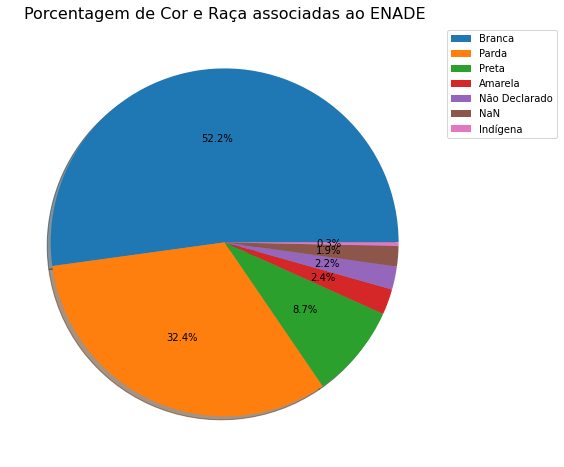

In [113]:
plt.figure(figsize=(10,8))
plt.title("Porcentagem de Cor e Raça associadas ao ENADE", fontsize=16)
plt.pie(df.QE_I02.value_counts(), autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1, 1), loc='best', labels=['Branca','Parda','Preta','Amarela','Não Declarado','NaN','Indígena'])

plt.show()

## 3.3. Qual eh a renda média dos inscritos no ENADE?

In [147]:
#modificando os valores das labels para amostragem
renda = df['QE_I08'].replace({'A': 'Até 1,5 salário mínimo', 'B':'De 1,5 a 3 salários mínimos', 'C':'De 3 a 4,5 salários mínimos', 'D':'De 4,5 a 6 salários mínimos', 'E':'De 6 a 10 salários mínimos', 'F':'De 10 a 30 salários mínimos', 'G':'Acima de 30 salários mínimos'})

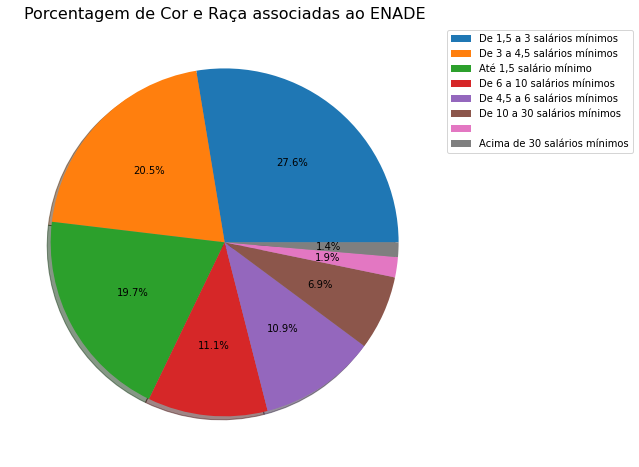

In [148]:
plt.figure(figsize=(10,8))
plt.title("Porcentagem de Cor e Raça associadas ao ENADE", fontsize=16)
plt.pie(renda.value_counts(), autopct='%1.1f%%', shadow=True)
plt.legend(bbox_to_anchor=(1, 1), loc='best', labels=renda.value_counts().index)

plt.show()

## 3.3. MÉDIA DAS NOTAS DO ENADE ASSOCIADAS AOS CURSOS?

## 3.5. MÉDIA DAS NOTAS DO ENADE ASSOCIADA À RENDA?

# 4. Aprendizado de Máquina